![](./assets/header.png)

<span style="float: right; font-size: 20px; font-weight: bolder;">Projeto Final</span> 

**Professores:**
- Dr. Gilberto Queiroz
- Dr. Rafael Santos

**Discente:**
- Adriano Almeida

## Índice
- [1. Introdução](#Introdução)
    - [1.1 Dados](#dados)
- [2. Refêrencias](#Referências)

In [218]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import rasterio as rio

In [9]:
DATA = '../data/lite'
mat_data_dir = os.path.join(DATA, 'mat')

In [12]:
mat_data_files = [os.path.join(mat_data_dir, file).replace('\\', '/') 
                  for file in os.listdir(mat_data_dir)]
matdf = [pd.read_csv(file, sep='\s+') for file in mat_data_files]
matdf = pd.concat(matdf, sort=False)
matdf = matdf.rename(str.lower, axis='columns')
matdf.head()

,year,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
0,2014.0,8.0,1.0,0.0,0.0,5.0,-60.7114,-1.8089,84.0,53.0,20.3750,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8345,0.2359
1,2014.0,8.0,1.0,0.0,0.0,5.0,-60.6914,-1.8089,85.0,53.0,20.4531,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8446,0.2423
2,2014.0,8.0,1.0,0.0,0.0,5.0,-60.6714,-1.8089,86.0,53.0,20.0781,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7974,0.2460
3,2014.0,8.0,1.0,0.0,0.0,5.0,-60.7714,-1.8289,81.0,54.0,20.5156,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8527,0.1908
4,2014.0,8.0,1.0,0.0,0.0,5.0,-60.7514,-1.8289,82.0,54.0,23.2969,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.9183,0.2526


Sumarização de algumas estatísticas referente aos dados:

- reflect: Refletividade mínima, média e máxima para cada mês observado.
- precipipit: Precipitação  mínima, média e máxima para cada mês observado.
- yyyyy_xx1: Número de descargas elétricas detectadas pelo sensor negativo da rede GLD360.
- yyyyy_xx2: Número de descargas elétricas detectadas pelo sensor positivo da rede GLD360.
- yyyyyyy_xx3: Número de descargas elétricas detectadas pelos sensores da rede STARNET.
- yyy_xx4: Número de descargas elétricas detectadas pelo sensor negativo da rede LINET.
- yyy_xx5: Número de descargas elétricas detectadas pelo sensor positivo da rede LINET.

In [140]:
aggregated = matdf.groupby(['month']).agg({
    'reflect': ['min', 'mean', 'max'], 
    'precipit': ['min', 'mean', 'max'], 
    'yyyyy_xx1': ['sum'], 
    'yyyyy_xx2': ['sum'],
    'yyyyyyy_xx3': ['sum'],
    'yyy_xx4': ['sum'],
    'yyy_xx5': ['sum'],
})
aggregated

reflect                     precipit                      yyyyy_xx1  \
           min       mean      max      min       mean       max       sum   
month                                                                        
2.0    20.0000  22.237465  28.6406   0.7878   1.303322    4.4302       0.0   
3.0    19.9688  24.017269  36.1562   0.7841   2.215520   14.3779       0.0   
8.0    19.9688  26.856456  56.5469   0.7841   6.409934  350.6001       0.0   
9.0    19.9688  29.325333  52.6250   0.7841  10.352333  189.6784      69.0   
10.0   19.9688  27.909266  54.4688   0.7841   9.332301  253.1879       0.0   

      yyyyy_xx2 yyyyyyy_xx3 yyy_xx4 yyy_xx5  
            sum         sum     sum     sum  
month                                        
2.0         0.0         0.0     0.0     0.0  
3.0         0.0         0.0     0.0     0.0  
8.0         0.0         0.0     0.0     0.0  
9.0       251.0        92.0   109.0    91.0  
10.0        0.0         0.0     0.0     1.0

No handles with labels found to put in legend.


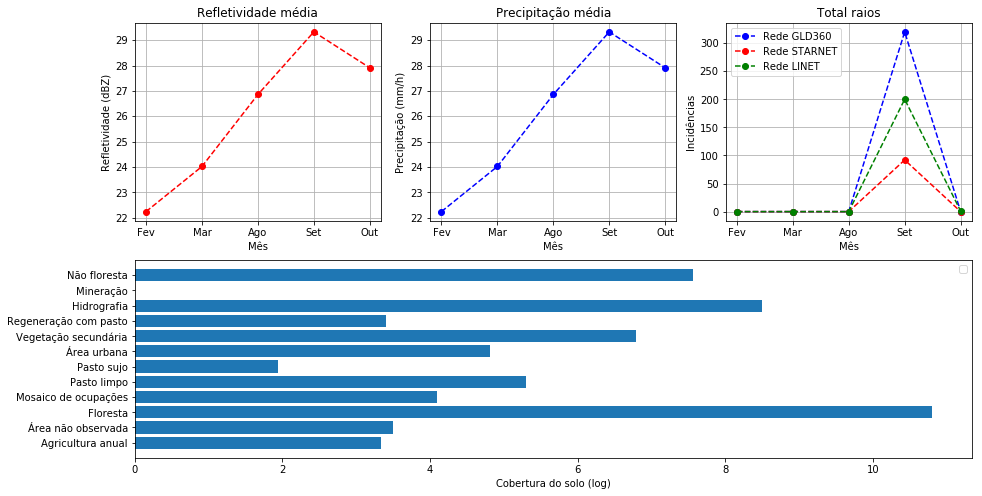

In [270]:
fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 3)

ax1 = fig.add_subplot(gs[0, 0])

mean_reflect = aggregated.reflect['mean'].to_list()
ax1.set_title('Refletividade média')
ax1.set_xlabel('Mês')
ax1.set_ylabel('Refletividade (dBZ)')
ax1.plot(months, mean_reflect, 'go--', color='r')
ax1.grid()

ax2 = fig.add_subplot(gs[0, 1])
mean_precipit = aggregated.precipit['mean'].to_list()
ax2.set_title('Precipitação média')
ax2.set_xlabel('Mês')
ax2.set_ylabel('Precipitação (mm/h)')
ax2.plot(months, mean_reflect, 'go--', color='b')
ax2.grid()

##ligning
ax3 = fig.add_subplot(gs[0, 2])
total_light1 = aggregated.yyyyy_xx1['sum']+aggregated.yyyyy_xx2['sum']
total_light1 = total_light1.to_list()
ax3.set_title('Total raios')
ax3.set_xlabel('Mês')
ax3.set_ylabel('Incidências')
ax3.plot(months, total_light1, 'go--', color='b', label='Rede GLD360')
ax3.grid()

total_light1 = aggregated.yyyyyyy_xx3['sum']
total_light1 = total_light1.to_list()
ax3.set_title('Total raios')
ax3.set_xlabel('Mês')
ax3.set_ylabel('Incidências')
ax3.plot(months, total_light1, 'go--', color='r', label='Rede STARNET')
ax3.grid()

total_light1 = aggregated.yyy_xx4['sum']+aggregated.yyy_xx5['sum']
total_light1 = total_light1.to_list()
ax3.set_title('Total raios')
ax3.set_xlabel('Mês')
ax3.set_ylabel('Incidências')
ax3.plot(months, total_light1, 'go--', color='g', label='Rede LINET')
ax3.grid()
ax3.legend()
## end lightning

ax4 = fig.add_subplot(gs[1, :])
with rio.open('./utils/landcover.tif') as src:
    raster = src.read(1, masked=True)
    
landcover = {1: "Agricultura anual", 
            2: "Área não observada", 3: "Floresta", 
            4: "Mosaico de ocupações", 5: "Pasto limpo", 
            6: "Pasto sujo", 7: "Área urbana", 
            8: "Vegetação secundária", 9: "Regeneração com pasto", 
            11: "Hidrografia", 12: "Mineração", 15: "Não floresta"}

classes = {}
for x in range(1, 17):
    if x in landcover.keys():
        classes[x] = 0

for x in range(241):
    for y in range(241):
        pixel = int(raster[x][y])
        if pixel in landcover.keys():
            classes[pixel] += 1
            
classes = [classes[key] for key in classes.keys()]
landcover = [landcover[key] for key in landcover.keys()]
classeslog = np.log(classes)
ax4.barh(landcover, classeslog)
ax4.set_xlabel('Cobertura do solo (log)')
ax4.legend()
# for i, v in enumerate(classes):
#     ax4.text(v+3, i+.25, str(v))

<function matplotlib.pyplot.show(*args, **kw)>

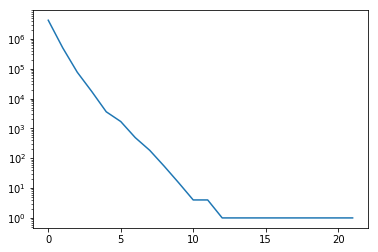

In [259]:
 xArray = range(22)
yArray = [4194304,497420,76230,17220,3595,1697,491,184,54,15,4,4,1,1,1,1,1,1,1,1,1,1]

plt.semilogy(xArray,yArray)
plt.show

([<matplotlib.patches.Wedge at 0x7feef5293438>,
 [Text(1.0999986915520028, 0.0016966389957071182, 'Agricultura anual'),
  Text(1.0999867803598105, 0.0053928687781416565, 'Área não observada'),
  Text(-0.993817133200506, 0.4715161776197376, 'Floresta'),
  Text(0.6928542663895894, -0.854372849255958, 'Mosaico de ocupações'),
  Text(0.7050658674631922, -0.8443234703230607, 'Pasto limpo'),
  Text(0.7146934862309059, -0.8361897037987936, 'Pasto sujo'),
  Text(0.7206631825500549, -0.8310502856727904, 'Área urbana'),
  Text(0.7655869972159735, -0.7898585630945765, 'Vegetação secundária'),
  Text(0.8043267653992485, -0.7503722106144273, 'Regeneração com pasto'),
  Text(0.9751537049185988, -0.5089943533906155, 'Hidrografia'),
  Text(1.075137441873039, -0.2325499539511842, 'Mineração'),
  Text(1.0937699217865018, -0.11690747707118648, 'Não floresta')])

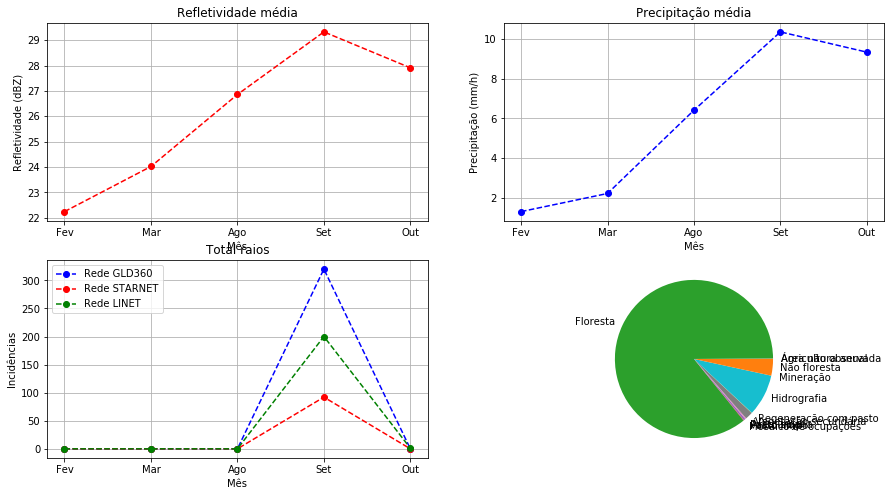

In [206]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
months = ['Fev', 'Mar', 'Ago', 'Set', 'Out']

mean_reflect = aggregated.reflect['mean'].to_list()
ax[0, 0].set_title('Refletividade média')
ax[0, 0].set_xlabel('Mês')
ax[0, 0].set_ylabel('Refletividade (dBZ)')
ax[0, 0].plot(months, mean_reflect, 'go--', color='r')
ax[0, 0].grid()

mean_precipit = aggregated.precipit['mean'].to_list()
ax[0, 1].set_title('Precipitação média')
ax[0, 1].set_xlabel('Mês')
ax[0, 1].set_ylabel('Precipitação (mm/h)')
ax[0, 1].plot(months, mean_precipit, 'go--', color='b')
ax[0, 1].grid()

total_light1 = aggregated.yyyyy_xx1['sum']+aggregated.yyyyy_xx2['sum']
total_light1 = total_light1.to_list()
ax[1, 0].set_title('Total raios')
ax[1, 0].set_xlabel('Mês')
ax[1, 0].set_ylabel('Incidências')
ax[1, 0].plot(months, total_light1, 'go--', color='b', label='Rede GLD360')
ax[1, 0].grid()

total_light1 = aggregated.yyyyyyy_xx3['sum']
total_light1 = total_light1.to_list()
ax[1, 0].set_title('Total raios')
ax[1, 0].set_xlabel('Mês')
ax[1, 0].set_ylabel('Incidências')
ax[1, 0].plot(months, total_light1, 'go--', color='r', label='Rede STARNET')
ax[1, 0].grid()

total_light1 = aggregated.yyy_xx4['sum']+aggregated.yyy_xx5['sum']
total_light1 = total_light1.to_list()
ax[1, 0].set_title('Total raios')
ax[1, 0].set_xlabel('Mês')
ax[1, 0].set_ylabel('Incidências')
ax[1, 0].plot(months, total_light1, 'go--', color='g', label='Rede LINET')
ax[1, 0].grid()
# ax[1, 0].label()
ax[1, 0].legend()

with rio.open('./utils/landcover.tif') as src:
    raster = src.read(1, masked=True)
    
landcover = {1: "Agricultura anual", 
            2: "Área não observada", 3: "Floresta", 
            4: "Mosaico de ocupações", 5: "Pasto limpo", 
            6: "Pasto sujo", 7: "Área urbana", 
            8: "Vegetação secundária", 9: "Regeneração com pasto", 
            11: "Hidrografia", 12: "Mineração", 15: "Não floresta"}

classes = {}
for x in range(1, 17):
    if x in landcover.keys():
        classes[x] = 0

for x in range(241):
    for y in range(241):
        pixel = int(raster[x][y])
        if pixel in landcover.keys():
            classes[pixel] += 1
            
classes = [classes[key] for key in classes.keys()]
landcover = [landcover[key] for key in landcover.keys()]
ax[1, 1].pie(x=classes, labels=landcover)

Nesses dados podem ser observado que o mês com a maior ocorrência de descargas elétricas foi setembro.

In [15]:
mfeb = matdf.loc[matdf['month'] == 2]
mmar = matdf.loc[matdf['month'] == 3]
mago = matdf.loc[matdf['month'] == 8]
msep = matdf.loc[matdf['month'] == 9]
moct = matdf.loc[matdf['month'] == 10]